In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [4]:
# Observational dataset 
dso=xr.open_dataset('./final_obs_files/TS_climatology_like_wilson2019_withoutANZFLUX.nc')
dso

<xarray.Dataset>
Dimensions:         (depth: 401, month: 12)
Coordinates:
  * month           (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth           (depth) int64 0 5 10 15 20 25 ... 1980 1985 1990 1995 2000
Data variables:
    T_clim_obs      (month, depth) float64 ...
    S_clim_obs      (month, depth) float64 ...
    MLD01_clim_obs  (month) float64 ...
    MLD03_clim_obs  (month) float64 ...
    prof_mon        (month) float64 ...

In [6]:
# NEMO runs
ds01=xr.open_dataset('../../Maud12_sensitivityruns/EXP_REF/clim_wilson_EXP_REF.nc')

ds03=xr.open_dataset('../../Maud12_sensitivityruns/EXP_mfc_ori/clim_wilson_EXP_mfc_ori.nc')
ds04=xr.open_dataset('../../Maud12_sensitivityruns/EXP_mfc_mod/clim_wilson_EXP_mfc_mod.nc')


In [7]:
# interpolate observational dataset on Model grid

T_obs=dso.T_clim_obs.interp(depth=ds01.deptht)
S_obs=dso.S_clim_obs.interp(depth=ds01.deptht)

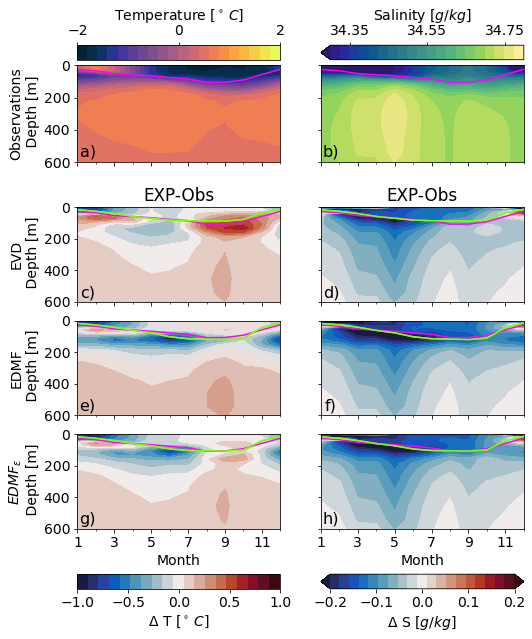

In [9]:
# Temperature
tmin=-2
tmax=2
tlev=21
tcmap=cmo.thermal
dtmin=-1
dtmax=1
dtlev=20
# Salinity
smin=34.3
smax=34.8
scmap=cmo.haline
slev=21
dsmin=-.2
dsmax=.2
dslev=20
ymax=600
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(8,10))
gs = GridSpec(3,1, height_ratios=[.8,2.2,0.1],wspace=.15,hspace=.3)#,wspace=0.3)

gs1 = GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0],hspace=0.1, height_ratios=[.15,1])
gs2 = GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[1],height_ratios=[1,1,1])
gs3 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2],height_ratios=[.15])
#observational dataset
cb_t = fig.add_subplot(gs1[0,0])
tobs = fig.add_subplot(gs1[1,0])
cb_s = fig.add_subplot(gs1[0,1])
sobs = fig.add_subplot(gs1[1,1])

evd_t = fig.add_subplot(gs2[0,0])
evd_s = fig.add_subplot(gs2[0,1])
edmf_t = fig.add_subplot(gs2[1,0])
edmf_s = fig.add_subplot(gs2[1,1])
edmf3_t = fig.add_subplot(gs2[2,0])
edmf3_s = fig.add_subplot(gs2[2,1])
cb_dt = fig.add_subplot(gs3[0])
cb_ds = fig.add_subplot(gs3[1])

# plot Temperture
cbt=T_obs.plot.contourf(x="month",y="deptht",ax=tobs,vmin=tmin,vmax=tmax,levels=tlev,cmap=tcmap,add_colorbar=False)
cbdt=(ds01.thetao-T_obs).plot.contourf(x="month",y="deptht",ax=evd_t,vmin=dtmin,vmax=dtmax,levels=dtlev,cmap=cmo.balance,add_colorbar=False)
(ds03.thetao-T_obs).plot.contourf(x="month",y="deptht",ax=edmf_t,vmin=dtmin,vmax=dtmax,levels=dtlev,cmap=cmo.balance,add_colorbar=False)
(ds04.thetao-T_obs).plot.contourf(x="month",y="deptht",ax=edmf3_t,vmin=dtmin,vmax=dtmax,levels=dtlev,cmap=cmo.balance,add_colorbar=False)
ds01.mldr10_1.plot(x="month",ax=evd_t,color='chartreuse')
ds03.mldr10_1.plot(x="month",ax=edmf_t,color='chartreuse')
ds04.mldr10_1.plot(x="month",ax=edmf3_t,color='chartreuse')
#plot Salinity
cbs=S_obs.plot.contourf(x="month",y="deptht",ax=sobs,vmin=smin,vmax=smax,levels=slev,cmap=scmap,add_colorbar=False)
cbds=(ds01.so-S_obs).plot.contourf(x="month",y="deptht",ax=evd_s,vmin=dsmin,vmax=dsmax,levels=dslev,cmap=cmo.balance,add_colorbar=False)
(ds03.so-S_obs).plot.contourf(x="month",y="deptht",ax=edmf_s,vmin=dsmin,vmax=dsmax,levels=dslev,cmap=cmo.balance,add_colorbar=False)
(ds04.so-S_obs).plot.contourf(x="month",y="deptht",ax=edmf3_s,vmin=dsmin,vmax=dsmax,levels=dslev,cmap=cmo.balance,add_colorbar=False)
ds01.mldr10_1.plot(x="month",ax=evd_s,color='chartreuse')
ds03.mldr10_1.plot(x="month",ax=edmf_s,color='chartreuse')
ds04.mldr10_1.plot(x="month",ax=edmf3_s,color='chartreuse')

#plot MLD in T and S
dso.MLD01_clim_obs.plot(x="month",ax=tobs,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=evd_t,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=edmf_t,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=edmf3_t,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=sobs,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=evd_s,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=edmf_s,color='fuchsia')
dso.MLD01_clim_obs.plot(x="month",ax=edmf3_s,color='fuchsia')


ds01.mldr10_1.plot(x="month",ax=evd_t,color='chartreuse')
ds03.mldr10_1.plot(x="month",ax=edmf_t,color='chartreuse')
ds04.mldr10_1.plot(x="month",ax=edmf3_t,color='chartreuse')
ds01.mldr10_1.plot(x="month",ax=evd_s,color='chartreuse')
ds03.mldr10_1.plot(x="month",ax=edmf_s,color='chartreuse')
ds04.mldr10_1.plot(x="month",ax=edmf3_s,color='chartreuse')
# plot label properties
tobs.set_ylim(ymax,0)
sobs.set_ylim(ymax,0)
evd_t.set_ylim(ymax,0)
evd_s.set_ylim(ymax,0)
edmf_t.set_ylim(ymax,0)
edmf_s.set_ylim(ymax,0)
edmf3_t.set_ylim(ymax,0)
edmf3_s.set_ylim(ymax,0)

sobs.set_yticklabels('')
evd_s.set_yticklabels('')
edmf_s.set_yticklabels('')
edmf3_s.set_yticklabels('')
sobs.set_ylabel('')
evd_s.set_ylabel('')
edmf_s.set_ylabel('')
edmf3_s.set_ylabel('')


tobs.set_xticks(ds01.month,minor=True)
sobs.set_xticks(ds01.month,minor=True)
evd_t.set_xticks(ds01.month,minor=True)
evd_s.set_xticks(ds01.month,minor=True)
edmf_t.set_xticks(ds01.month,minor=True)
edmf_s.set_xticks(ds01.month,minor=True)
edmf3_t.set_xticks(ds01.month,minor=True)
edmf3_s.set_xticks(ds01.month,minor=True)

tobs.set_xticks(ds01.month[::2])
sobs.set_xticks(ds01.month[::2])
evd_t.set_xticks(ds01.month[::2])
evd_s.set_xticks(ds01.month[::2])
edmf_t.set_xticks(ds01.month[::2])
edmf_s.set_xticks(ds01.month[::2])
edmf3_t.set_xticks(ds01.month[::2])
edmf3_s.set_xticks(ds01.month[::2])

tobs.set_xticklabels('')
evd_t.set_xticklabels('')
edmf_t.set_xticklabels('')
sobs.set_xticklabels('')
evd_s.set_xticklabels('')
edmf_s.set_xticklabels('')
tobs.set_xlabel('')
evd_t.set_xlabel('')
edmf_t.set_xlabel('')
sobs.set_xlabel('')
evd_s.set_xlabel('')
edmf_s.set_xlabel('')

 #   plt.ylabel('this is vertical\ntest', multialignment='center')
tobs.set_ylabel('Observations\n Depth [m]')
#evd_t.set_ylabel('EVD')
evd_t.set_ylabel('EVD\n Depth [m]')
edmf_t.set_ylabel('EDMF\n Depth [m]')
edmf3_t.set_ylabel('$EDMF_{\\epsilon}$\n Depth [m]')
edmf3_t.set_xlabel('Month')
edmf3_s.set_xlabel('Month')

tobs.text(0.05, 0.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=tobs.transAxes,fontsize='16')
sobs.text(0.05, 0.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=sobs.transAxes,fontsize='16')
evd_t.text(0.05, 0.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=evd_t.transAxes,fontsize='16')
evd_s.text(0.05, 0.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=evd_s.transAxes,fontsize='16')
edmf_t.text(0.05, 0.1, 'e)', horizontalalignment='center',verticalalignment='center', transform=edmf_t.transAxes,fontsize='16')
edmf_s.text(0.05, 0.1, 'f)', horizontalalignment='center',verticalalignment='center', transform=edmf_s.transAxes,fontsize='16')
edmf3_t.text(0.05, 0.1, 'g)', horizontalalignment='center',verticalalignment='center', transform=edmf3_t.transAxes,fontsize='16')
edmf3_s.text(0.05, 0.1, 'h)', horizontalalignment='center',verticalalignment='center', transform=edmf3_s.transAxes,fontsize='16')



evd_t.set_title('EXP-Obs')
evd_s.set_title('EXP-Obs')
tbbt=plt.colorbar(cbt,cax=cb_t,orientation='horizontal',ticks=np.linspace(-2,2,3),label='Temperature [$^\circ\,C$]')
tbbt.ax.xaxis.set_ticks_position('top')
tbbt.ax.xaxis.set_label_position('top')
plt.colorbar(cbdt,cax=cb_dt,orientation='horizontal',ticks=np.linspace(-1,1,5),label='$\Delta$ T [$^\circ\,C$]')
sbbs=plt.colorbar(cbs,cax=cb_s,orientation='horizontal',ticks=np.linspace(smin+0.05,smax-0.05,3),label='Salinity [$g/kg$]')
sbbs.ax.xaxis.set_ticks_position('top')
sbbs.ax.xaxis.set_label_position('top')
plt.colorbar(cbds,cax=cb_ds,orientation='horizontal',ticks=np.linspace(-0.2,0.2,5),label='$\Delta$ S [$g/kg$]')
plt.savefig('./wilson_010304.png',dpi=300)

In [10]:
# compute RMS
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [14]:
dept=33
ds01.deptht.isel(deptht=slice(0,dept)).values

array([5.0018466e-01, 1.5471070e+00, 2.6508777e+00, 3.8240666e+00,
       5.0820169e+00, 6.4434576e+00, 7.9312453e+00, 9.5732689e+00,
       1.1403550e+01, 1.3463583e+01, 1.5803957e+01, 1.8486322e+01,
       2.1585779e+01, 2.5193750e+01, 2.9421453e+01, 3.4404060e+01,
       4.0305683e+01, 4.7325310e+01, 5.5703812e+01, 6.5732216e+01,
       7.7761269e+01, 9.2212494e+01, 1.0959067e+02, 1.3049768e+02,
       1.5564740e+02, 1.8588129e+02, 2.2218340e+02, 2.6569406e+02,
       3.1771970e+02, 3.7973685e+02, 4.5338693e+02, 5.4045868e+02,
       6.4285455e+02], dtype=float32)

In [13]:
rmse01t=rmse(ds01.thetao.isel(deptht=slice(0,dept)),T_obs.isel(deptht=slice(0,dept)))
rmse03t=rmse(ds03.thetao.isel(deptht=slice(0,dept)),T_obs.isel(deptht=slice(0,dept)))
rmse04t=rmse(ds04.thetao.isel(deptht=slice(0,dept)),T_obs.isel(deptht=slice(0,dept)))
rmse01s=rmse(ds01.so.isel(deptht=slice(0,dept)),S_obs.isel(deptht=slice(0,dept)))
rmse03s=rmse(ds03.so.isel(deptht=slice(0,dept)),S_obs.isel(deptht=slice(0,dept)))
rmse04s=rmse(ds04.so.isel(deptht=slice(0,dept)),S_obs.isel(deptht=slice(0,dept)))
print(rmse01t.values,rmse01s.values)
print(rmse03t.values,rmse03s.values)
print(rmse04t.values,rmse04s.values)


0.2638730167864193 0.1520230923098303
0.3301198164699376 0.1624503924284807
0.3020556776037016 0.16018943376288497
